### 1) DATA PREPROCESSING

In [110]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset with a different encoding
file_path = 'data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset
print("Initial Dataset Preview:")
print(df.head())

# Check for basic information about the dataset
print("\nDataset Information:")
print(df.info())


# Display the first few rows of the dataset
print("Initial Dataset Preview:")
print(df.head())

# Check for basic information about the dataset
print("\nDataset Information:")
print(df.info())

Initial Dataset Preview:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------  

In [111]:
# 1. Handling Missing Values
# Check for missing values
print("\nMissing Values Check:")
print(df.isnull().sum())

# Drop columns with a high percentage of missing values (optional, threshold can be adjusted)
missing_threshold = 0.5  # 50% threshold
df = df[df.columns[df.isnull().mean() < missing_threshold]]

# Impute missing values for numerical columns with the median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Impute missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


Missing Values Check:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [113]:
# 2. Converting Data Types
# Convert date columns to datetime type if applicable
date_cols = ['Date', 'date', 'timestamp']  # Update with actual date column names
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert categorical columns to 'category' data type
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [116]:
# 3. Handling Duplicates
# Drop duplicate rows if any
df = df.drop_duplicates()

In [117]:
# 4. Standardize Column Names (optional)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Display the cleaned dataset information
print("\nCleaned Dataset Information:")
print(df.info())

# Preview the cleaned dataset
print("\nCleaned Dataset Preview:")
print(df.head())


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   invoiceno    536641 non-null  category
 1   stockcode    536641 non-null  category
 2   description  536641 non-null  category
 3   quantity     536641 non-null  int64   
 4   invoicedate  536641 non-null  category
 5   unitprice    536641 non-null  float64 
 6   customerid   536641 non-null  float64 
 7   country      536641 non-null  category
dtypes: category(5), float64(2), int64(1)
memory usage: 23.2 MB
None

Cleaned Dataset Preview:
  invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG 

In [120]:
# Export the cleaned dataset (optional)
output_path = 'cleaned_dataset.csv'
df.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to {output_path}")


Cleaned dataset saved to cleaned_dataset.csv


### 2) RFM CALCULATION

In [122]:
import pandas as pd
from datetime import datetime

# Convert 'invoicedate' to string first, then to datetime to ensure it's not treated as categorical
df['invoicedate'] = df['invoicedate'].astype(str)
df['invoicedate'] = pd.to_datetime(df['invoicedate'], errors='coerce')

# Drop rows where 'invoicedate' is NaT (failed datetime conversion)
df = df.dropna(subset=['invoicedate'])

# Confirm the data type of 'invoicedate'
print("Data type of 'invoicedate':", df['invoicedate'].dtype)

# Recency Calculation
max_date = df['invoicedate'].max()
print("Max Date:", max_date)

# Calculate Recency
df['Recency'] = (max_date - df.groupby('customerid')['invoicedate'].transform('max')).dt.days

# Frequency Calculation
df['Frequency'] = df.groupby('customerid')['invoiceno'].transform('nunique')

# Monetary Calculation
df['TotalPrice'] = df['quantity'] * df['unitprice']
df['Monetary'] = df.groupby('customerid')['TotalPrice'].transform('sum')

# Create the RFM DataFrame
rfm_df = df[['customerid', 'Recency', 'Frequency', 'Monetary']].drop_duplicates()

# Display the RFM DataFrame
print("\nRFM Metrics for Each Customer:")
print(rfm_df.head())
rfm_df

Data type of 'invoicedate': datetime64[ns]
Max Date: 2011-12-09 12:50:00

RFM Metrics for Each Customer:
    customerid  Recency  Frequency  Monetary
0      17850.0      301         35   5303.48
9      13047.0       31         18   3079.10
26     12583.0        2         18   7187.34
46     13748.0       95          5    948.25
65     15100.0      329          6    635.10


,customerid,Recency,Frequency,Monetary
0,17850.0,301,35,5303.48
9,13047.0,31,18,3079.10
26,12583.0,2,18,7187.34
46,13748.0,95,5,948.25
65,15100.0,329,6,635.10
...,...,...,...,...
536969,13436.0,1,1,196.89
537255,15520.0,1,1,343.50
538064,13298.0,0,1,360.00
538812,14569.0,0,1,227.39


### 3) RFM SEGMENTATION

In [124]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load the dataset (update the file path if needed)
file_path = 'data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'].astype(str), errors='coerce')

# Drop rows where 'InvoiceDate' is NaT
df = df.dropna(subset=['InvoiceDate'])

# Confirm the data type of 'InvoiceDate'
print("Data type of 'InvoiceDate':", df['InvoiceDate'].dtype)

# Recency Calculation
max_date = df['InvoiceDate'].max()
print("Max Date:", max_date)

# Calculate Recency
df['Recency'] = (max_date - df.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days

# Frequency Calculation
df['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')

# Monetary Calculation
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['Monetary'] = df.groupby('CustomerID')['TotalPrice'].transform('sum')

# Create the RFM DataFrame
rfm_df = df[['CustomerID', 'Recency', 'Frequency', 'Monetary']].drop_duplicates()

# Display the RFM DataFrame
print("\nRFM Metrics for Each Customer:")
print(rfm_df.head())

Data type of 'InvoiceDate': datetime64[ns]
Max Date: 2011-12-09 12:50:00

RFM Metrics for Each Customer:
    CustomerID  Recency  Frequency  Monetary
0      17850.0    301.0       35.0   5288.63
9      13047.0     31.0       18.0   3079.10
26     12583.0      2.0       18.0   7187.34
46     13748.0     95.0        5.0    948.25
65     15100.0    329.0        6.0    635.10


In [125]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Recency', 'Frequency',
       'TotalPrice', 'Monetary'],
      dtype='object')


In [126]:
import pandas as pd

# Calculate quartiles for Recency, Frequency, and Monetary
quartiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75])

# Define a function to assign RFM scores based on quartiles
def assign_score(value, metric):
    if metric == 'Recency':
        # Lower Recency values are better (more recent purchases)
        if value <= quartiles[metric][0.25]:
            return 4
        elif value <= quartiles[metric][0.5]:
            return 3
        elif value <= quartiles[metric][0.75]:
            return 2
        else:
            return 1
    else:
        # Higher Frequency and Monetary values are better
        if value <= quartiles[metric][0.25]:
            return 1
        elif value <= quartiles[metric][0.5]:
            return 2
        elif value <= quartiles[metric][0.75]:
            return 3
        else:
            return 4

# Assign RFM scores
rfm_df['R_Score'] = rfm_df['Recency'].apply(lambda x: assign_score(x, 'Recency'))
rfm_df['F_Score'] = rfm_df['Frequency'].apply(lambda x: assign_score(x, 'Frequency'))
rfm_df['M_Score'] = rfm_df['Monetary'].apply(lambda x: assign_score(x, 'Monetary'))

# Combine RFM scores into a single RFM score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Display the final RFM DataFrame with scores
result_df = rfm_df[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']]
print(result_df.head())

# Export the RFM DataFrame (optional)
output_path = 'rfm_scored.csv'
result_df.to_csv(output_path, index=False)
print(f"\nRFM scores saved to {output_path}")

    CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0      17850.0    301.0       35.0   5288.63        1        4        4   
9      13047.0     31.0       18.0   3079.10        3        4        4   
26     12583.0      2.0       18.0   7187.34        4        4        4   
46     13748.0     95.0        5.0    948.25        2        3        3   
65     15100.0    329.0        6.0    635.10        1        4        2   

   RFM_Score  
0        144  
9        344  
26       444  
46       233  
65       142  

RFM scores saved to rfm_scored.csv


### 4) CUSTOMER SEGMENTATION

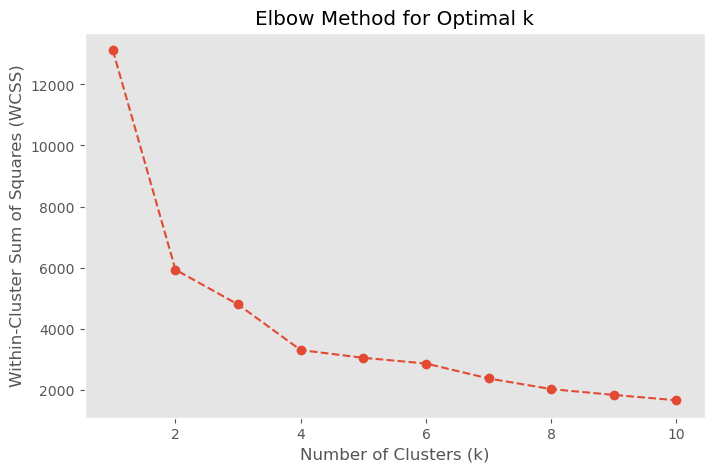

Silhouette Score for k=3: 0.37
   CustomerID  R_Score  F_Score  M_Score  Cluster
0     17850.0        1        4        4        0
1     13047.0        3        4        4        2
2     12583.0        4        4        4        2
3     13748.0        2        3        3        0
4     15100.0        1        4        2        0

Clustered data saved to rfm_clusters.csv


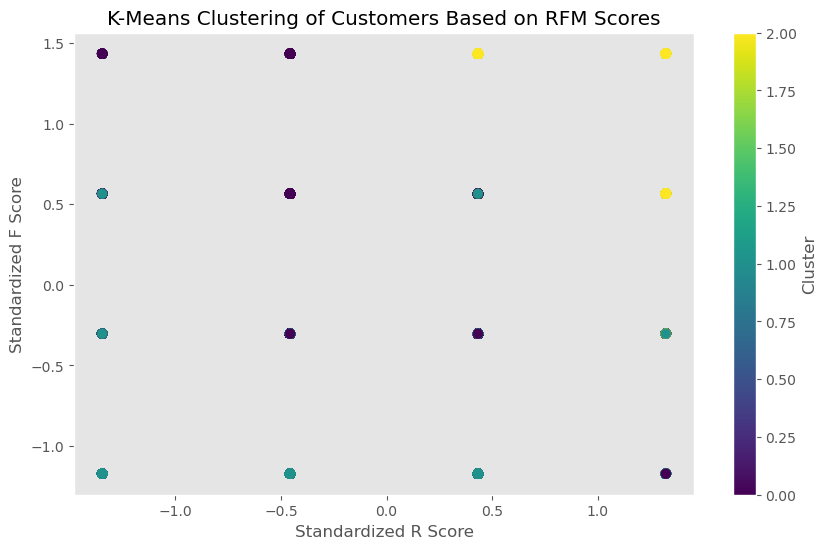

In [128]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset (update the file path if needed)
file_path = 'rfm_scored.csv'
df = pd.read_csv(file_path)

# 1. Extract RFM Scores for Clustering
rfm_data = df[['R_Score', 'F_Score', 'M_Score']]

# 2. Standardize the Data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# 3. Find the Optimal Number of Clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, max_iter=300)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

# Choose the optimal number of clusters (based on the Elbow plot)
optimal_k = 3

# 4. Apply K-Means Clustering with the Optimal Number of Clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, max_iter=300)
df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 5. Calculate Silhouette Score (Optional: Evaluate the clustering quality)
silhouette_avg = silhouette_score(rfm_scaled, df['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg:.2f}")

# 6. Display the Resulting DataFrame with Cluster Assignments
result_df = df[['CustomerID', 'R_Score', 'F_Score', 'M_Score', 'Cluster']]
print(result_df.head())

# Export the DataFrame with Clusters (optional)
output_path = 'rfm_clusters.csv'
result_df.to_csv(output_path, index=False)
print(f"\nClustered data saved to {output_path}")

# 7. Visualize the Clusters (Optional)
plt.figure(figsize=(10, 6))
plt.scatter(rfm_scaled[:, 0], rfm_scaled[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering of Customers Based on RFM Scores')
plt.xlabel('Standardized R Score')
plt.ylabel('Standardized F Score')
plt.grid()
plt.colorbar(label='Cluster')
plt.show()

### 5) SEGMENT PROFILING


Customer Segment Profiling:
          R_Score   F_Score   M_Score  Customer Count        Segment Label
Cluster                                                                   
0        2.286491  2.636446  3.062557            1102        High Spenders
1        1.890486  1.389495  1.496036            2018  Low-Value Customers
2        3.718850  3.643770  3.623802            1252            Champions

Segment profiling saved to segment_profile.csv


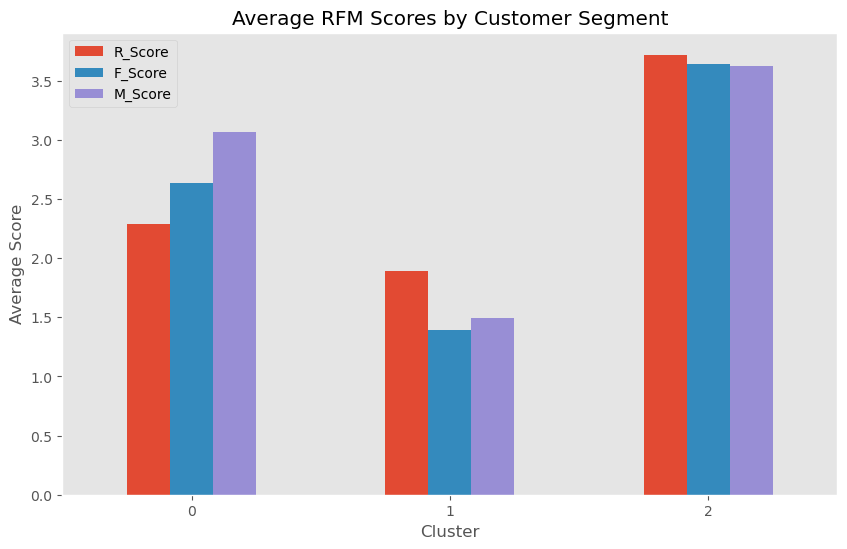

In [131]:
import pandas as pd
import numpy as np

# Load the clustered DataFrame (update the file path if needed)
file_path = 'rfm_clusters.csv'
df = pd.read_csv(file_path)

# 1. Analyze and Profile Each Segment
# Group the data by 'Cluster' and calculate the mean of RFM scores and count of customers
cluster_profile = df.groupby('Cluster').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Customer Count'})

# Add a descriptive name for each segment based on the RFM score characteristics
def label_segment(row):
    if row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'Champions'
    elif row['R_Score'] >= 3 and row['F_Score'] < 3:
        return 'Recent but Infrequent'
    elif row['R_Score'] < 3 and row['F_Score'] >= 3:
        return 'Frequent but Not Recent'
    elif row['R_Score'] < 3 and row['M_Score'] >= 3:
        return 'High Spenders'
    else:
        return 'Low-Value Customers'

cluster_profile['Segment Label'] = cluster_profile.apply(label_segment, axis=1)

# 2. Display the Segment Profile
print("\nCustomer Segment Profiling:")
print(cluster_profile)

# 3. Export the Segment Profile (optional)
output_path = 'segment_profile.csv'
cluster_profile.to_csv(output_path)
print(f"\nSegment profiling saved to {output_path}")

# 4. Visualize the Segment Profile (Optional)
import matplotlib.pyplot as plt

# Plot the average RFM scores for each cluster
cluster_profile[['R_Score', 'F_Score', 'M_Score']].plot(kind='bar', figsize=(10, 6))
plt.title('Average RFM Scores by Customer Segment')
plt.xlabel('Cluster')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.grid()
plt.show()

### 1) Cluster Profiling
- Groups the data by cluster and calculates the **mean RFM scores** for each segment.
- Counts the **number of customers** in each segment.
- Assigns a **descriptive label** based on the RFM score characteristics.

### 2) Segment Labels
- **Champions**: High R, F, and M scores (recent, frequent, and high spenders).
- **Recent but Infrequent**: High R but low F scores (recent buyers but not frequent).
- **Frequent but Not Recent**: High F but low R scores (frequent buyers but not recent).
- **High Spenders**: High M score but lower R or F scores.
- **Low-Value Customers**: Low R, F, and M scores.

### 3) Visualization
- Provides a **bar chart** of average RFM scores for each segment.
- Helps to visually compare the characteristics of different customer segments.


### 6) MARKET RECOMMENDATIONS

### 1. Champions

- **Characteristics**:
  - High Recency, Frequency, and Monetary scores.
  - These are the best customers: recent, frequent buyers who spend the most.

- **Marketing Strategy**:
  - **Loyalty Programs**: Offer exclusive loyalty rewards or VIP programs to keep them engaged.
  - **Personalized Offers**: Provide special offers, early access to new products, and personalized discounts.
  - **Referral Programs**: Encourage them to refer friends and family by offering referral bonuses.
  - **Product Launches**: Engage them in new product launches as they are likely to be early adopters.

### 2. Recent but Infrequent

- **Characteristics**:
  - High Recency, low Frequency, and moderate Monetary scores.
  - These customers have made recent purchases but are not frequent buyers.

- **Marketing Strategy**:
  - **Engagement Campaigns**: Send targeted email campaigns or reminders to encourage repeat purchases.
  - **Upsell and Cross-sell**: Recommend complementary products to increase order value.
  - **Incentivize Frequency**: Offer discounts or promotions for multiple purchases (e.g., "Buy 2, Get 1 Free").
  - **Feedback Request**: Ask for feedback on their recent purchase to make them feel valued.

### 3. Frequent but Not Recent

- **Characteristics**:
  - High Frequency, low Recency, and moderate Monetary scores.
  - These customers used to buy frequently but haven’t made a purchase recently.

- **Marketing Strategy**:
  - **Reactivation Campaigns**: Use re-engagement strategies like special discounts or limited-time offers.
  - **Win-Back Strategy**: Send personalized emails highlighting products they have purchased in the past.
  - **Replenishment Reminders**: If they bought consumable items, send reminders when it might be time to reorder.
  - **Reconnect with New Products**: Introduce new or updated products to rekindle their interest.

### 4. High Spenders

- **Characteristics**:
  - High Monetary scores, but lower Recency or Frequency.
  - These customers spend a lot when they purchase but do not buy frequently.

- **Marketing Strategy**:
  - **Exclusive Discounts on High-Value Products**: Offer targeted promotions on high-ticket items.
  - **Premium Experience**: Provide a premium or personalized shopping experience to make them feel special.
  - **Bundling Offers**: Create bundle deals to increase purchase frequency.
  - **Nurture Relationship**: Send thank-you notes or personalized appreciation messages after large purchases.

### 5. Low-Value Customers

- **Characteristics**:
  - Low Recency, Frequency, and Monetary scores.
  - These are less engaged customers who do not contribute significantly to revenue.

- **Marketing Strategy**:
  - **Educational Campaigns**: Educate them about the benefits of your products or services through email campaigns.
  - **Incentivize Purchase**: Use deep discounts or first-time buyer offers to encourage purchasing.
  - **Exit Strategy**: Consider reducing marketing spend on this group if re-engagement campaigns do not yield results.
  - **Collect Feedback**: Understand why they aren’t purchasing and gather insights for improvement.

### 7) VISUALIZATION

<Figure size 1200x600 with 0 Axes>

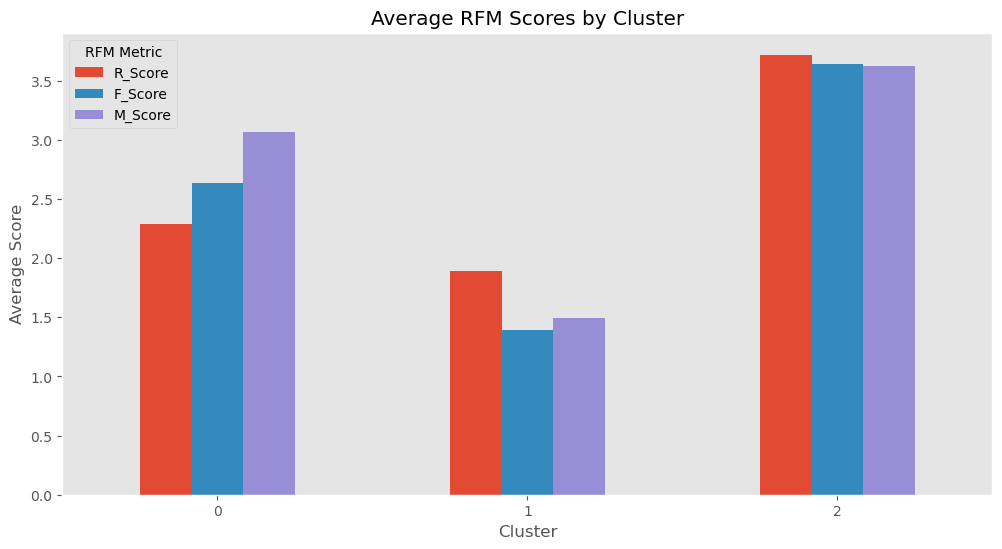

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the clustered DataFrame (update the file path if needed)
file_path = 'rfm_clusters.csv'
df = pd.read_csv(file_path)

# 1) Bar Chart: Average RFM Scores by Cluster
# Group by 'Cluster' and calculate the mean of R, F, and M scores
cluster_profile = df.groupby('Cluster').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean'
}).reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
cluster_profile.plot(kind='bar', x='Cluster', figsize=(12, 6))
plt.title('Average RFM Scores by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='RFM Metric')
plt.grid()
plt.show()

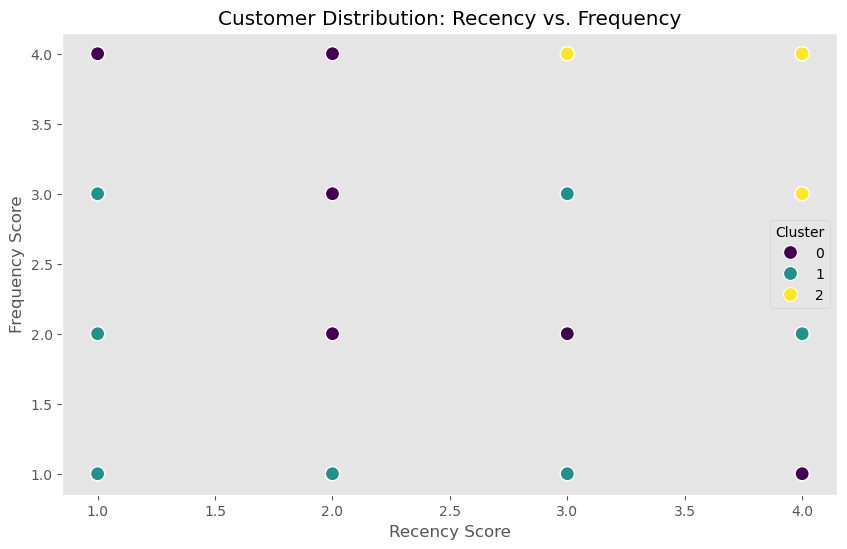

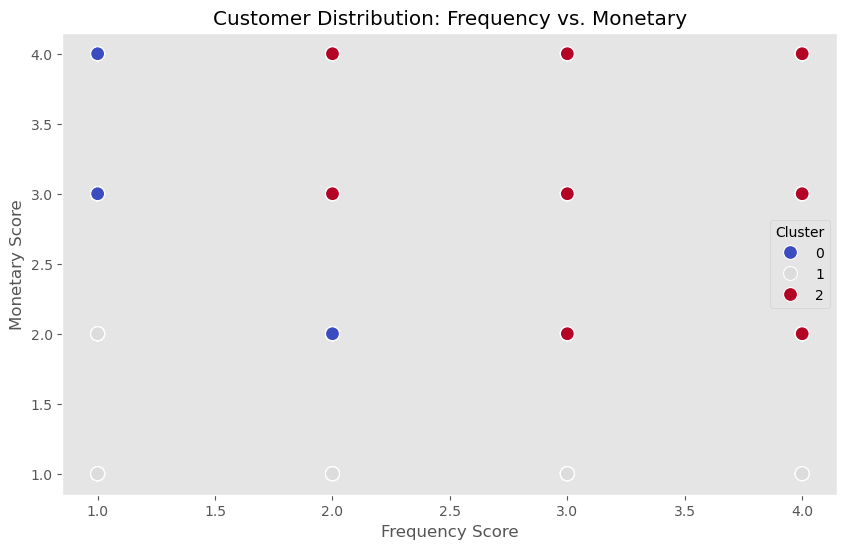

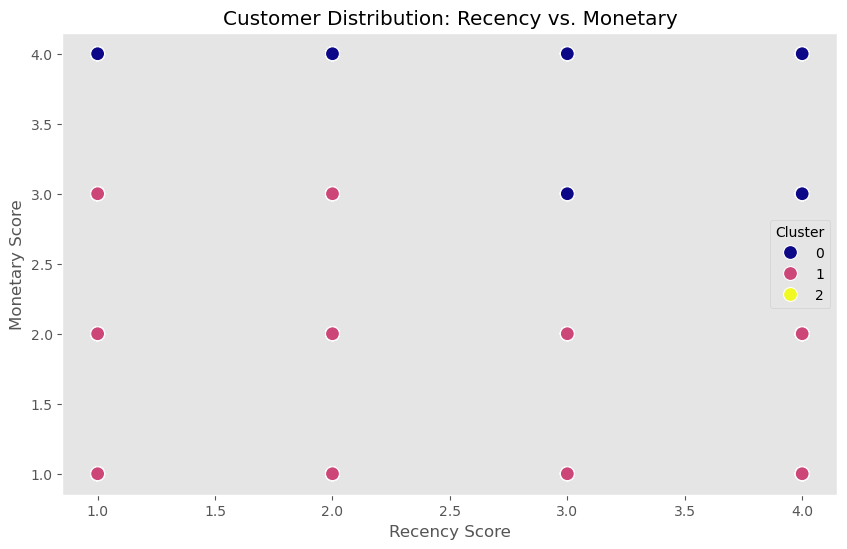

In [141]:

# 2) Scatter Plot: Distribution of Customers Based on RFM Scores
# Scatter plot for Recency vs. Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='R_Score', y='F_Score', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Distribution: Recency vs. Frequency')
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.grid()
plt.legend(title='Cluster')
plt.show()

# Scatter plot for Frequency vs. Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='F_Score', y='M_Score', hue='Cluster', palette='coolwarm', s=100)
plt.title('Customer Distribution: Frequency vs. Monetary')
plt.xlabel('Frequency Score')
plt.ylabel('Monetary Score')
plt.grid()
plt.legend(title='Cluster')
plt.show()

# Scatter plot for Recency vs. Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='R_Score', y='M_Score', hue='Cluster', palette='plasma', s=100)
plt.title('Customer Distribution: Recency vs. Monetary')
plt.xlabel('Recency Score')
plt.ylabel('Monetary Score')
plt.grid()
plt.legend(title='Cluster')
plt.show()

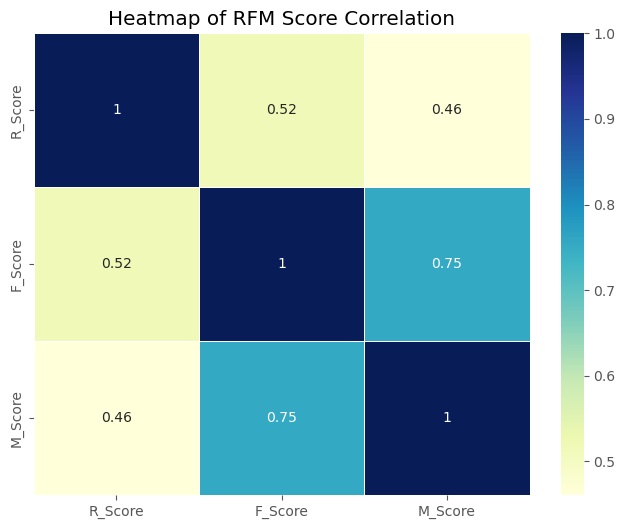

In [142]:
# 3) Heatmap: Correlation between RFM Scores
# Calculate the correlation matrix
rfm_corr = df[['R_Score', 'F_Score', 'M_Score']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_corr, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of RFM Score Correlation')
plt.show()

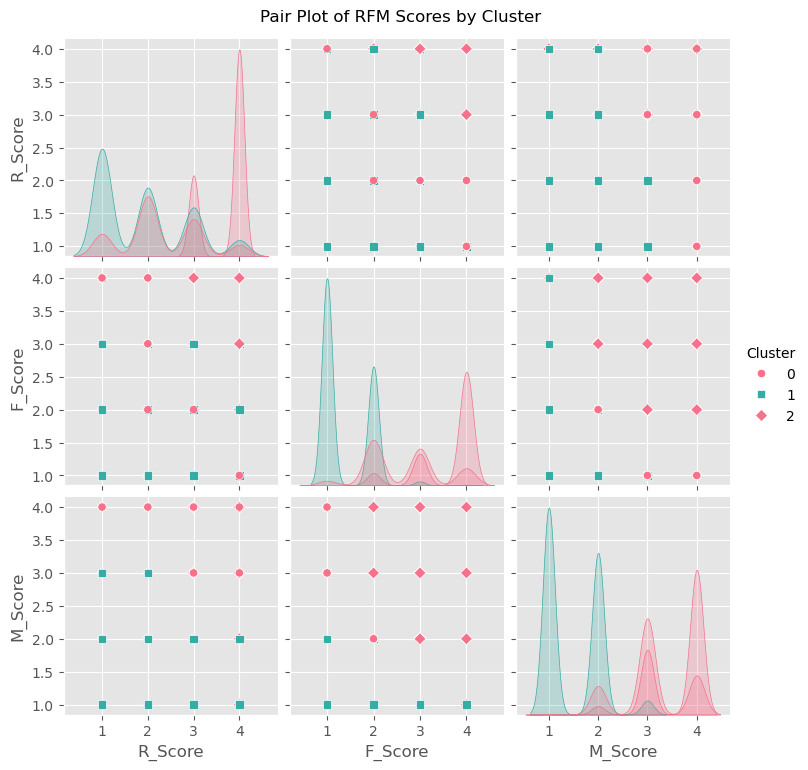

In [143]:
# 4) Pair Plot: RFM Score Distribution Colored by Cluster
sns.pairplot(df[['R_Score', 'F_Score', 'M_Score', 'Cluster']], hue='Cluster', palette='husl', diag_kind='kde', markers=['o', 's', 'D'])
plt.suptitle('Pair Plot of RFM Scores by Cluster', y=1.02)
plt.show()

### i) DATA OVERVIEW

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Data overview
print("\nDataset Information:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display the first few rows
print("\nPreview of the Dataset:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

Statistical Summary:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   1515

### ii) CUSTOMER ANALYSIS

Total Unique Customers: 4372


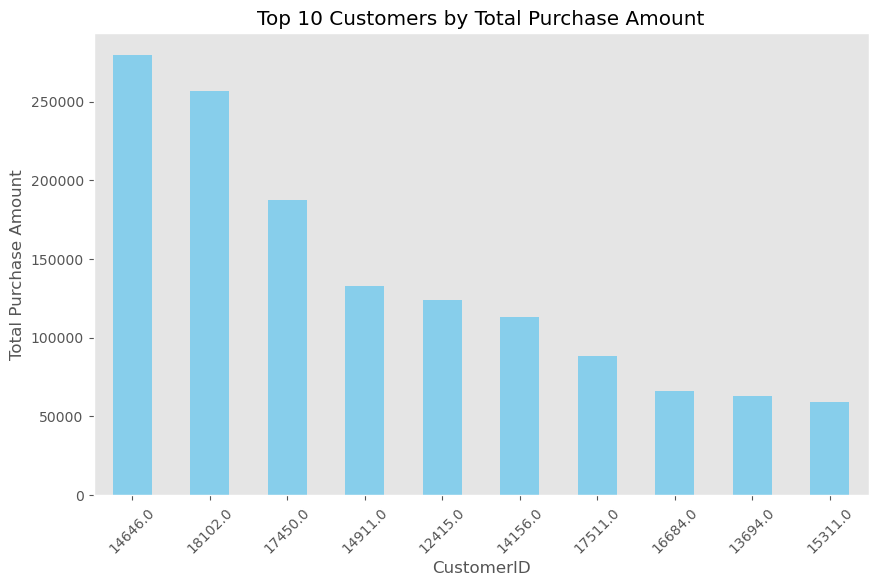

In [147]:
# Number of unique customers
unique_customers = df['CustomerID'].nunique()
print(f"Total Unique Customers: {unique_customers}")

# Top 10 customers by total purchase amount
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().nlargest(10)

# Plot the top 10 customers
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customers by Total Purchase Amount')
plt.xlabel('CustomerID')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### iii) PRODUCT ANALYSIS

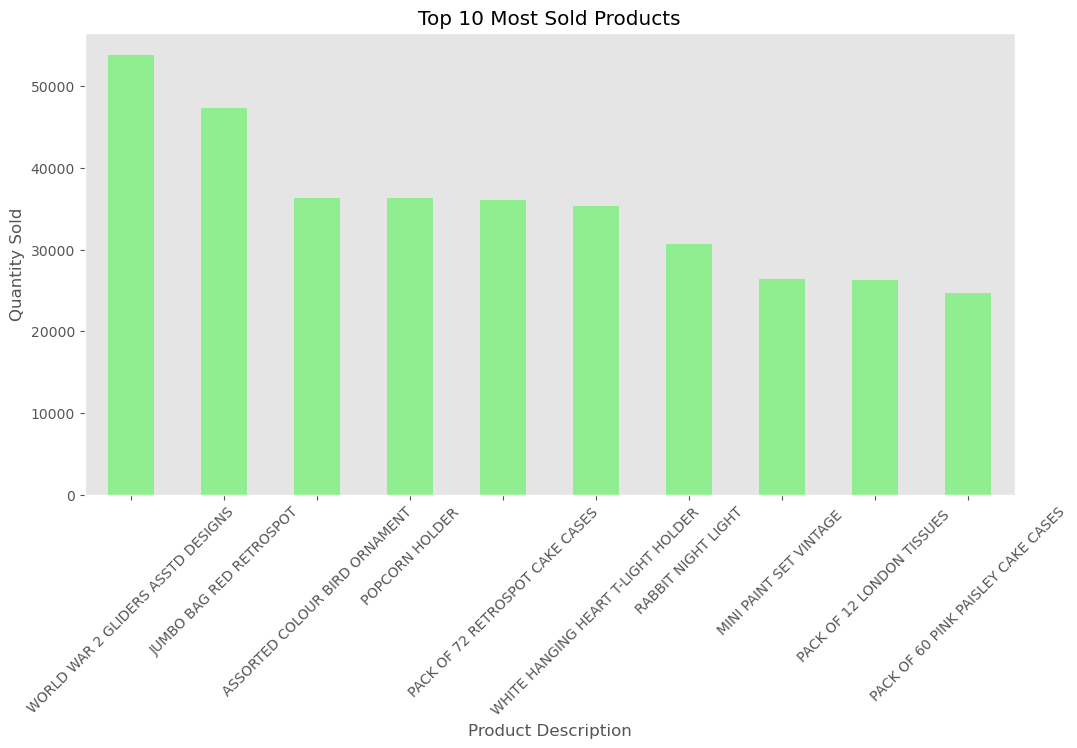

In [151]:
# Top 10 most sold products
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)

# Plot the top 10 products
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [152]:
# 3.1) Top 10 most frequently purchased products

frequent_products = df.groupby('Description')['Quantity'].sum()
top_10_products = frequent_products.sort_values(ascending=False).head(10)
top_10_products_df = pd.DataFrame({'Description': top_10_products.index, 'TotalQuantity': top_10_products.values})
print("Top 10 Most Frequently Purchased Products:")
print(top_10_products_df)

Top 10 Most Frequently Purchased Products:
                          Description  TotalQuantity
0   WORLD WAR 2 GLIDERS ASSTD DESIGNS          53847
1             JUMBO BAG RED RETROSPOT          47363
2       ASSORTED COLOUR BIRD ORNAMENT          36381
3                      POPCORN HOLDER          36334
4     PACK OF 72 RETROSPOT CAKE CASES          36039
5  WHITE HANGING HEART T-LIGHT HOLDER          35317
6                  RABBIT NIGHT LIGHT          30680
7             MINI PAINT SET VINTAGE           26437
8          PACK OF 12 LONDON TISSUES           26315
9  PACK OF 60 PINK PAISLEY CAKE CASES          24753


In [154]:
# 3.2) Average price of products
average_price = df['UnitPrice'].mean()
print("Average price of products:", average_price)

Average price of products: 4.611113626088513


In [155]:
# 3.3) Highest revenue product

df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
product_revenue = df.groupby('Description')['TotalRevenue'].sum()
highest_revenue_product = product_revenue.idxmax()
highest_revenue_value = product_revenue.max()

print(f"The product '{highest_revenue_product}' generates the highest revenue with a total of {highest_revenue_value:.2f} $")

The product 'DOTCOM POSTAGE' generates the highest revenue with a total of 206245.48 $


### iv) TIME ANALYSIS

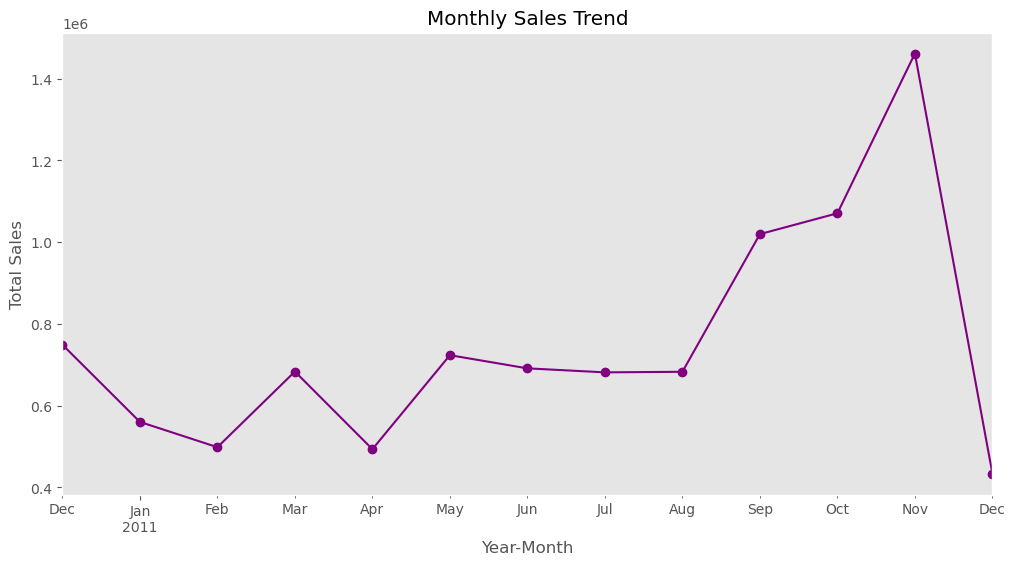

In [157]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Monthly sales analysis
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

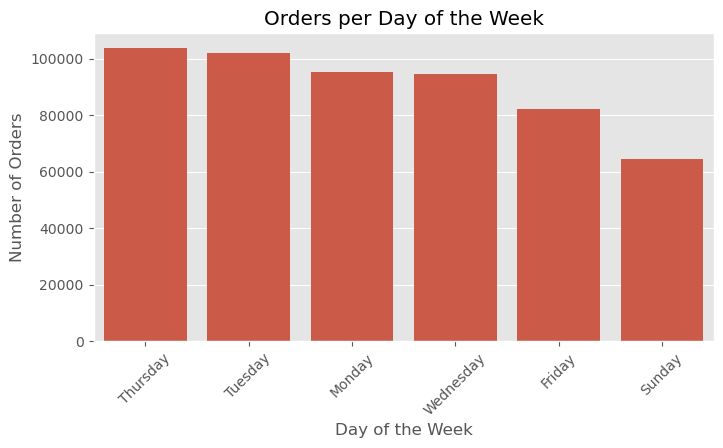

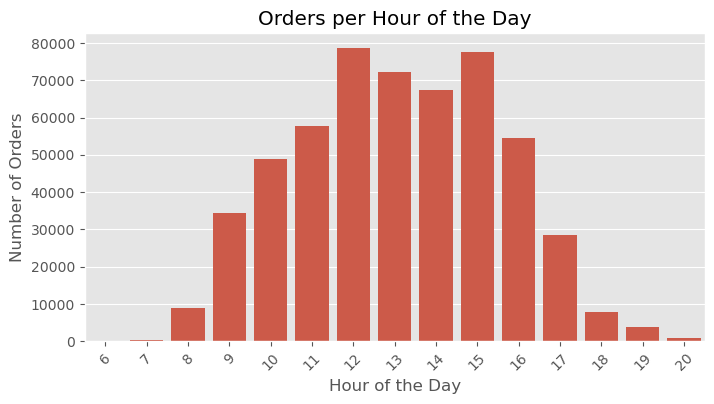

In [204]:
# 4.1)Is there a specific day of the week or time of day when most orders are placed?

# Orders per Day of the Week
plt.figure(figsize=(8, 4))
sns.barplot(x=orders_per_day.index, y=orders_per_day.values, color='C0')  # Use a single color
plt.title('Orders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Orders per Hour of the Day
plt.figure(figsize=(8, 4))
sns.barplot(x=orders_per_hour.index, y=orders_per_hour.values, color='C0')  # Use a single color
plt.title('Orders per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

### v) GEOGRPAHICAL ANALYSIS

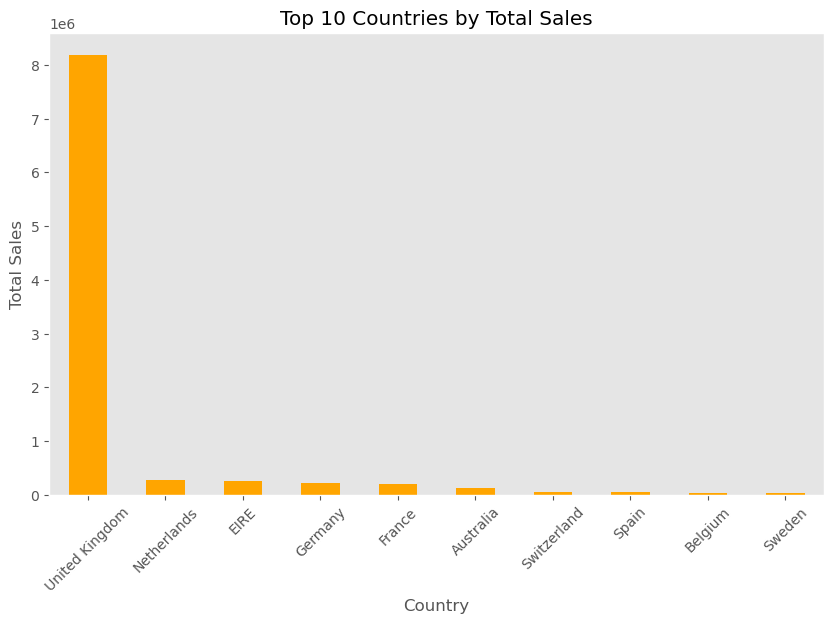

In [162]:
# Total sales by country
sales_by_country = df.groupby('Country')['TotalPrice'].sum().nlargest(10)

# Plot the top 10 countries by total sales
plt.figure(figsize=(10, 6))
sales_by_country.plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

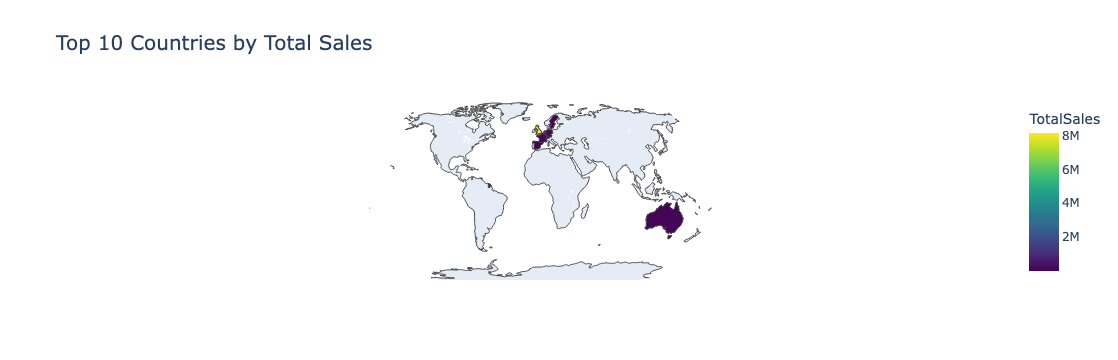

In [163]:
import plotly.express as px
import pandas as pd

# Calculate total sales by country
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index(name='TotalSales')

# Create a choropleth map for Top 10 Countries by Total Sales
fig = px.choropleth(
    top_countries,
    locations='Country',
    locationmode='country names',
    color='TotalSales',
    color_continuous_scale="Viridis",
    title='Top 10 Countries by Total Sales'
)

# Update the map projection and appearance
fig.update_geos(projection_type="natural earth")
fig.update_layout(
    title_font_size=20,
    geo=dict(showframe=False, showcoastlines=True)
)

# Show the map
fig.show()

### vi) PAYMENT ANALYSIS

In [165]:
import random

payment_methods = ['Credit card', 'Debit card', 'Cash']
random_payment_methods = [random.choice(payment_methods) for _ in range(len(df))]
df['Payment Method'] = random_payment_methods

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,TotalRevenue,YearMonth,DayOfWeek,HourOfDay,Payment Method
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30,2010-12,Wednesday,8,Credit card
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010-12,Wednesday,8,Cash
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00,2010-12,Wednesday,8,Debit card
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010-12,Wednesday,8,Credit card
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010-12,Wednesday,8,Credit card


In [166]:
payment_method_count=df.groupby('Payment Method')['CustomerID'].count()
variable=payment_method_count.idxmax()
print("The method of payment which the customers is frequently is",variable)

The method of payment which the customers is frequently is Cash


Payment Method
Cash           17.050140
Credit card    17.256718
Debit card     19.657092
Name: TotalPrice, dtype: float64


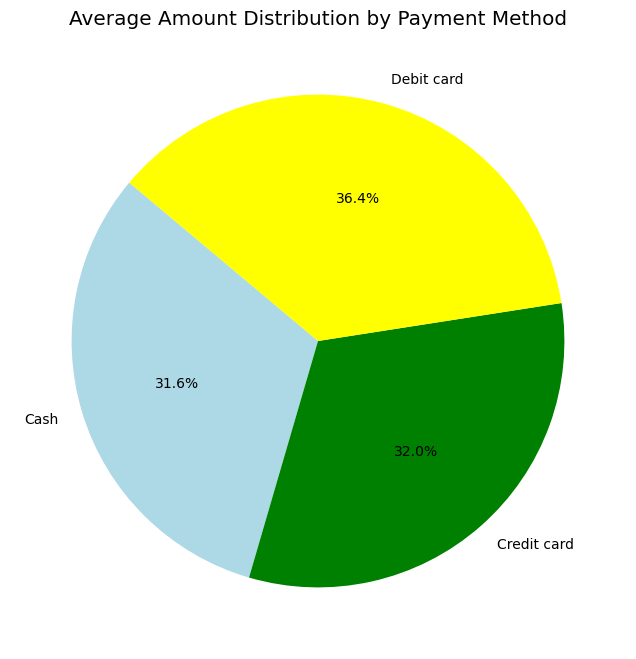

In [168]:
# Calculate the average amount for each payment method
average_amount = df.groupby('Payment Method')['TotalPrice'].mean()

# Print the average amount
print(average_amount)

plt.figure(figsize=(8, 8))
plt.pie(average_amount, labels=average_amount.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'green', 'yellow', 'orange'])
plt.title('Average Amount Distribution by Payment Method')
plt.show()

#### Relationship between the payment method and the order amount

#### People using Credit card on an average purchase for higher amount compared to people using other payment methods.

### vii) CUSTOMER BEHAVIOR ANALYSIS

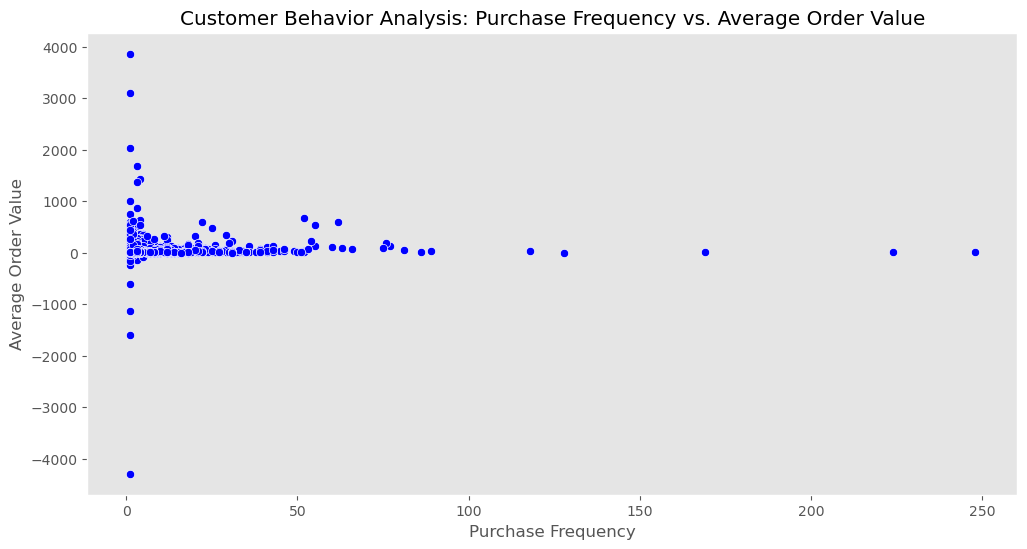

In [172]:
# Calculate purchase frequency and average order value
customer_analysis = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Purchase frequency
    'TotalPrice': 'mean'     # Average order value
}).rename(columns={'InvoiceNo': 'PurchaseFrequency', 'TotalPrice': 'AverageOrderValue'})

# Plot customer behavior
plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_analysis, x='PurchaseFrequency', y='AverageOrderValue', color='blue')
plt.title('Customer Behavior Analysis: Purchase Frequency vs. Average Order Value')
plt.xlabel('Purchase Frequency')
plt.ylabel('Average Order Value')
plt.grid()
plt.show()

### viii) RETURNS

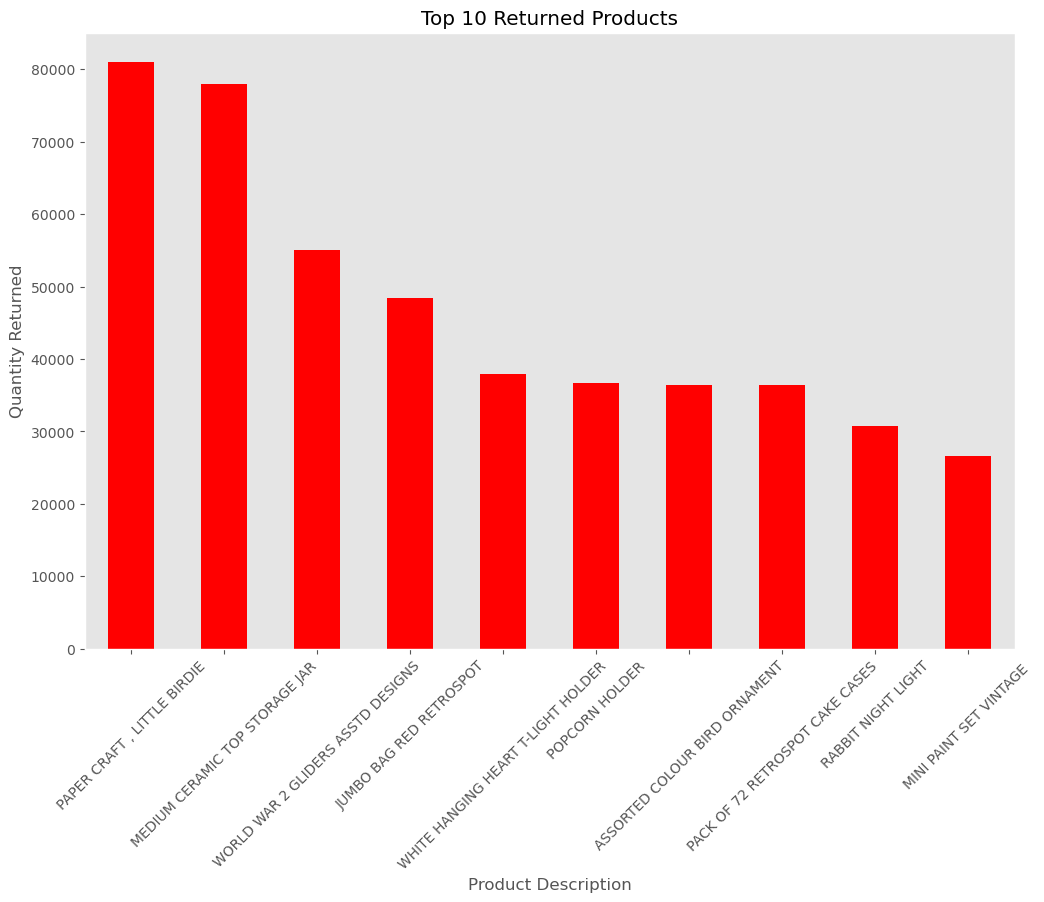

In [176]:
# Filter returns (negative quantities)
returns = df[df['Quantity'] > 0]

# Top products by number of returns
top_returns = returns.groupby('Description')['Quantity'].sum().nlargest(10)

# Plot top returned products
plt.figure(figsize=(12, 8))
top_returns.plot(kind='bar', color='red')
plt.title('Top 10 Returned Products')
plt.xlabel('Product Description')
plt.ylabel('Quantity Returned')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### ix) PROFITABILITY ANALYSIS

In [182]:
random.seed(42)
df['SellingUnitPrice'] = df['UnitPrice'] * (1 + (random.uniform(0, 0.2)))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,TotalRevenue,YearMonth,DayOfWeek,HourOfDay,Payment Method,SellingUnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30,2010-12,Wednesday,8,Credit card,2.876108
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010-12,Wednesday,8,Cash,3.823531
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00,2010-12,Wednesday,8,Debit card,3.101685
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010-12,Wednesday,8,Credit card,3.823531
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010-12,Wednesday,8,Credit card,3.823531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,10.20,2011-12,Friday,12,Credit card,0.958703
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12.60,2011-12,Friday,12,Cash,2.368559
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,16.60,2011-12,Friday,12,Credit card,4.680724
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,16.60,2011-12,Friday,12,Debit card,4.680724


In [184]:
random.seed(42)
df['CostUnitPrice'] = df['UnitPrice'] * (1 - (random.uniform(0, 0.1)))
df['CostUnitPrice']=df['CostUnitPrice'].round(2)
df['CostPrice']=df['CostUnitPrice']*df['Quantity']
df['Profit']=df['TotalPrice']-df['CostPrice']
Total_profit_generated=df['Profit'].sum()

print("Total profit generated: ")
print(Total_profit_generated)

sorted_df = df.sort_values(by=['Profit'], ascending=[False])
print("\nTop products with higher profits:\n \n",sorted_df['Description'].head(8))

Total profit generated: 
622917.5040000001

Top products with higher profits:
 
 540421            PAPER CRAFT , LITTLE BIRDIE
61619          MEDIUM CERAMIC TOP STORAGE JAR
222680         PICNIC BASKET WICKER 60 PIECES
15017                              AMAZON FEE
299982                        Adjust bad debt
173382                                POSTAGE
348325    SET OF TEA COFFEE SUGAR TINS PANTRY
52711      FAIRY CAKE FLANNEL ASSORTED COLOUR
Name: Description, dtype: object
